# look at training of deep cell network
12/08/17: 
- I used a black and white mask for nuclei channel and fluorescent images for cell channel
- I used deepcell_covert_env to make training data npz
- I used deepcellkeras1_env to train network
- retrained with better masks for feature 0/1/2

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_loss_dict(loss_file):
    ll = np.load(loss_file)
    l = ll['loss_history']
    loss = l.any()

    return loss

In [3]:
def plot_accuracy(loss, save_name=None, exp_name=None):
    plt.plot(loss['acc'])
    plt.plot(loss['val_acc'])
    plt.title('Model Accuracy')
    if exp_name:
        plt.suptitle(exp_name)
    plt.ylabel('Classification Accuracy')
    plt.xlabel('Training Epoch')
    plt.legend(['Training', 'Validation'], loc='center right')
    plt.show()
    if save_name:
        plt.savefig(save_name)

In [4]:
def plot_loss(loss, save_name=None, exp_name=None):
    plt.plot(loss['loss'])
    plt.plot(loss['val_loss'])
    plt.title('Model Loss')
    if exp_name:
        plt.suptitle(exp_name)
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()
    if save_name:
        plt.savefig(save_name)

In [14]:
loss_file='/home/amandap/DeepCellKimmel/trained_networks/2017-12-07_AT22LA_all_61x61_2_20171207_AT22LA_bn_feature_net_61x61_0.npz'
loss_0=get_loss_dict(loss_file)

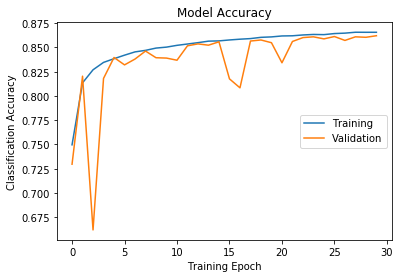

In [15]:
plot_accuracy(loss_0)

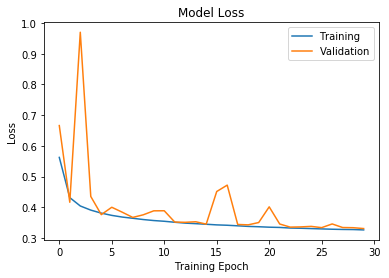

In [16]:
plot_loss(loss_0)

In [17]:
loss_file='/home/amandap/DeepCellKimmel/trained_networks/2017-12-08_AT22LA_all_61x61_2_20171207_AT22LA_bn_feature_net_61x61_1.npz'
loss_1=get_loss_dict(loss_file)

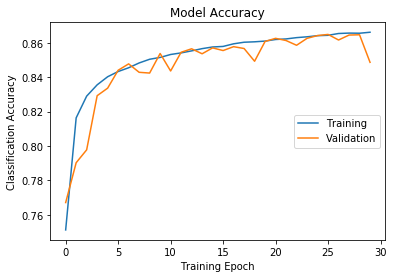

In [18]:
plot_accuracy(loss_1)

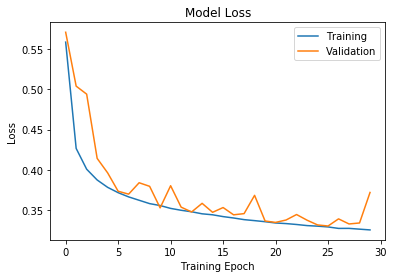

In [19]:
plot_loss(loss_1)

In [20]:
loss_file='/home/amandap/DeepCellKimmel/trained_networks/2017-12-08_AT22LA_all_61x61_2_20171207_AT22LA_bn_feature_net_61x61_2.npz'
loss_2=get_loss_dict(loss_file)

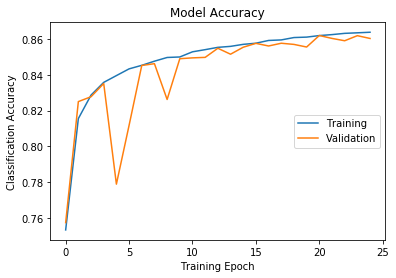

In [21]:
plot_accuracy(loss_2)

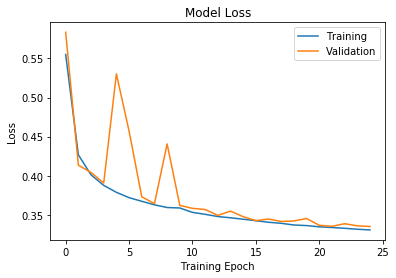

In [22]:
plot_loss(loss_2)

## plot all

In [75]:
def plot_mult_accuracy(loss, save_name=None, exp_name=None):
    ax1.plot(loss['acc'], 'b-')
    ax1.plot(loss['val_acc'], 'r--')
    plt.title('Model Accuracy')
    if exp_name:
        plt.suptitle(exp_name)
    plt.ylabel('Classification Accuracy')
    plt.xlabel('Training Epoch')
    plt.legend(['Training', 'Validation'], loc='center right')
    fig.show()
    if save_name:
        plt.savefig(save_name)

/home/amandap/anaconda3/envs/deepcellkeras1_env/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


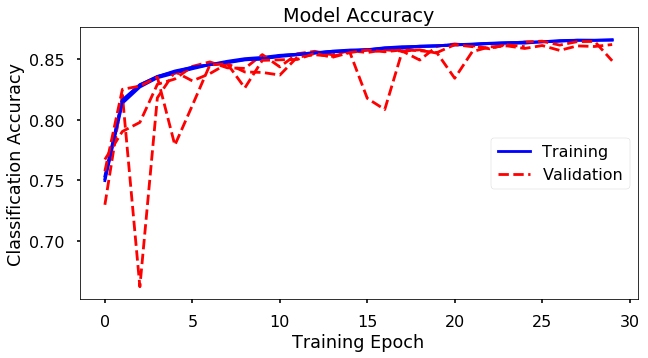

In [82]:
sns.set_context('poster')
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)
plot_mult_accuracy(loss_0)
plot_mult_accuracy(loss_1)
plot_mult_accuracy(loss_2)

In [84]:
def plot_mult_loss(loss, save_name=None, exp_name=None):
    ax1.plot(loss['loss'], 'b-')
    ax1.plot(loss['val_loss'], 'r--')
    plt.title('Model Loss')
    if exp_name:
        plt.suptitle(exp_name)
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    fig.show()
    if save_name:
        plt.savefig(save_name)

/home/amandap/anaconda3/envs/deepcellkeras1_env/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


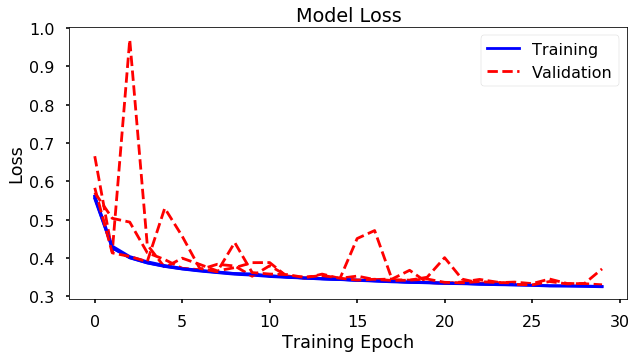

In [85]:
sns.set_context('poster')
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)
plot_mult_loss(loss_0)
plot_mult_loss(loss_1)
plot_mult_loss(loss_2)

In [93]:
print(loss_0)
print('\n')
print(loss_1)
print('\n')
print(loss_2)

{'acc': [0.74964017948451855, 0.81353851049760117, 0.82697952574169964, 0.83460409588597118, 0.83841380033807189, 0.84205842768278183, 0.84544253961748717, 0.84701852691931379, 0.84936573787384984, 0.8503587878727209, 0.8521952879807867, 0.85356750367877077, 0.8549577772275726, 0.85650796811392493, 0.85678396022907022, 0.85774089935916886, 0.8585327614930317, 0.85914922828677931, 0.86044148340290627, 0.86089545088291497, 0.8618627074199926, 0.8620458421755699, 0.86289186858005229, 0.86341805726904253, 0.86322976501776871, 0.86433114756438134, 0.8647773770831686, 0.86569562607430994, 0.86564403958350555, 0.86565951574363265], 'val_loss': [0.66592111132945075, 0.41610716768369277, 0.97002612667766497, 0.43500459828357013, 0.37576473064140004, 0.39980430875002854, 0.38366535978236233, 0.36670916292717037, 0.37518384163011392, 0.38816179223247071, 0.38838908512974707, 0.35156631447933651, 0.3507331112619313, 0.35255966918806703, 0.34487348651726585, 0.45112913548821848, 0.47189530056950374

In [97]:
import scipy.stats as stats
val_acc=np.mean([0.86210738521273467, 0.84864311986949514, 0.86031988729498443])
val_std=stats.sem([0.86210738521273467, 0.84864311986949514, 0.86031988729498443])
print("Accuracy is ", val_acc, " +/- ", val_std)

Accuracy is  0.857023464126  +/-  0.00422182482628


In [99]:
val_loss=np.mean([0.3304155356063842, 0.37182208203602751, 0.33525726810077977])
val_loss_std=stats.sem([0.3304155356063842, 0.37182208203602751, 0.33525726810077977])
print("Loss is ", val_loss, " +/- ", val_loss_std)

Loss is  0.345831628581  +/-  0.0130701740167
